<a href="https://colab.research.google.com/github/Honmaru0/Codenation-Aceleradev-2020---DataScience/blob/master/CODENATION_SISTEMA_DE_RECOMENDA%C3%87%C3%83O_EXPERIMENTOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
cd /content/drive/My Drive/PROJETO FINAL - CODENATION

/content/drive/My Drive/PROJETO FINAL - CODENATION


#CRIAÇÃO DO MODELO

Nesta etapa serão executados: redução de dimensionalidade, algorítmos de clustering, comparação de métricas.

##1º IMPORTAR BIBLIOTECAS E DATASET

In [188]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

In [189]:
mercado = pd.read_csv('mercado_data.csv')
pd.set_option('display.max_rows', 200)
sn.set()

In [190]:
mercado.head(5)

,Unnamed: 0,fl_matriz,idade_empresa_anos,idade_emp_cat,fl_mei,fl_email,fl_telefone,fl_veiculo,fl_optante_simples,fl_optante_simei,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,nm_micro_regiao_AGLOMERACAO URBANA DE SAO LUIS,nm_micro_regiao_MANAUS,nm_micro_regiao_NATAL,nm_meso_regiao_CENTRO AMAZONENSE,nm_meso_regiao_CENTRO NORTE PIAUIENSE,nm_meso_regiao_LESTE POTIGUAR,nm_meso_regiao_NORTE MARANHENSE,sg_uf_matriz_AM,sg_uf_matriz_MA,sg_uf_matriz_PI,sg_uf_matriz_RN,sg_uf_matriz_RO,nm_segmento_COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E MOTOCICLETAS,nm_segmento_OUTRAS ATIVIDADES DE SERVICOS,nm_divisao_COMERCIO VAREJISTA,setor_COMERCIO,setor_SERVIÇO,de_ramo_COMERCIO VAREJISTA,de_ramo_SERVICOS DIVERSOS,natureza_juridica_macro_ENTIDADES EMPRESARIAIS,natureza_juridica_macro_OUTROS,sg_uf_AM,sg_uf_MA,sg_uf_PI,sg_uf_RN,sg_uf_RO,de_natureza_juridica_EMPRESARIO INDIVIDUAL,de_natureza_juridica_SOCIEDADE EMPRESARIA LIMITADA,fl_rm_NAO,fl_rm_SIM
0,0,1,14.457534,3,0,1,1,0,1,0,4,3,23.0,3,1,3,3,3132172.8,3132172.8,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1
1,1,1,1.463014,1,1,1,1,0,1,0,2,2,9.0,1,1,1,1,210000.0,210000.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1
2,2,1,7.093151,2,1,0,1,0,1,1,2,3,26.0,2,1,0,0,50000.0,50000.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1
3,3,1,6.512329,2,0,1,1,0,1,0,2,3,26.0,2,1,1,1,210000.0,210000.0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1
4,4,1,3.200000,1,0,1,1,0,1,0,4,3,27.0,3,1,1,1,210000.0,210000.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1


In [191]:
mercado = mercado.drop(columns = 'Unnamed: 0')

Agora, as features são passadas para uma matriz:

In [192]:
X = mercado.values

##ANÁLISE DE ALGORÍTMOS

In [193]:
#ESCALAR FEATURES
from sklearn.preprocessing import StandardScaler
#REDUÇÃO DA DIMENSÃO
from sklearn.decomposition import PCA
#CLUSTERIZAÇÃO
from sklearn.cluster import KMeans
#COEFICIENTES DE SIMILARIDADE
from scipy.spatial.distance import cosine

In [194]:
#APLICANDO A ESCALA
sc = StandardScaler()
X = sc.fit_transform(X)

#REDUÇÃO DAS DIMENSÕES
pca = PCA(n_components=2)
X = pca.fit_transform(X)
#APLICANDO A CLUSTERIZAÇÃO
clust = KMeans(n_clusters=6)
y = clust.fit_predict(X)

In [195]:
port1 = pd.read_csv('estaticos_portfolio1.csv')
port2 = pd.read_csv('estaticos_portfolio2.csv')
port3 = pd.read_csv('estaticos_portfolio3.csv')
mercad = pd.read_csv('estaticos_market.csv')
id = mercad['id'].values.tolist()
id1 = port1['id'].values.tolist()
id2 = port2['id'].values.tolist()
id3 = port3['id'].values.tolist()

In [196]:
Resultado  = pd.DataFrame({'Empresa':id,'Grupo':y.tolist()})
Resultado

,Empresa,Grupo
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,2
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,2
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,0
...,...,...
462293,469ee5fc984d0bb60aa2f40cda4d003d7c9b963d149ed3...,3
462294,656f496e7e2fad708f0022d8ad97d2cb9344e839a5f3cb...,2
462295,9b933a5cf2149d1338f00fb459d34a16b9b0f2e8d3e8e1...,5
462296,84db0f17467cf4f02439e01ade57150b6ac59d9dae53ed...,1


#SIMULAÇÃO NO PORTIFÓLIO 1

In [197]:
end =[]
scores =[]
#achar index das empresas contidas no portifólio
for empresa in id1:
  end.append(id.index(empresa))
#grupo a que cada cluster pertence
clusters = Resultado['Grupo'].iloc[end].values.tolist()
res = pd.DataFrame({'End_portifolio':end,'Grupo_portifolio':clusters})
#fazer iteracao para cada empresa e verificar quantos dos 10 melhores leads também são do portifólio
for i in range(0,len(end)):
  filtro = res['End_portifolio'].loc[res['Grupo_portifolio']==clusters[i]].values.tolist()
  metric = []
  leads  = []
  
  for lead in filtro:
    leads.append(id[lead])
    metric.append(cosine(X[end[i],:],X[lead,:]))
  #print('Para empresa: ',id1[i])
  
  #filtra os melhores leads para a empresa usada
  resultado = pd.DataFrame({'Lead':leads,'Similaridade':metric}).sort_values(by='Similaridade',ascending = False)
  resultado = resultado['Lead'].iloc[:10].values.tolist()
  score = 0
  #verifica quais dos 10 leads também pertencem ao portifólio
  for lead in resultado:
    if lead in id1:
      score = score + 1 
  scores.append(score*10)

Após a simulação, foi feita distribuição de score:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Ocorrências')

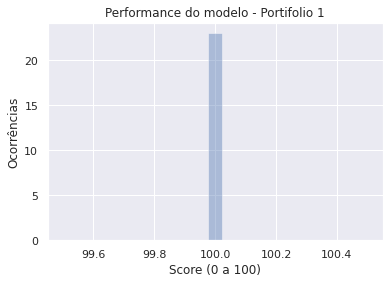

In [198]:
sn.distplot(scores)
plt.title('Performance do modelo - Portifolio 1')
plt.xlabel('Score (0 a 100)')
plt.ylabel('Ocorrências')

In [199]:
Resultado  = pd.DataFrame({'Empresa':id,'Grupo':y.tolist()})

In [200]:
end =[]
scores =[]
#achar index das empresas contidas no portifólio
for empresa in id2:
  end.append(id.index(empresa))
#grupo a que cada cluster pertence
clusters = Resultado['Grupo'].iloc[end].values.tolist()
res = pd.DataFrame({'End_portifolio':end,'Grupo_portifolio':clusters})
#fazer iteracao para cada empresa e verificar quantos dos 10 melhores leads também são do portifólio
for i in range(0,len(end)):
  filtro = res['End_portifolio'].loc[res['Grupo_portifolio']==clusters[i]].values.tolist()
  metric = []
  leads  = []
  
  for lead in filtro:
    leads.append(id[lead])
    metric.append(cosine(X[end[i],:],X[lead,:]))
  #print('Para empresa: ',id1[i])
  
  #filtra os melhores leads para a empresa usada
  resultado = pd.DataFrame({'Lead':leads,'Similaridade':metric}).sort_values(by='Similaridade',ascending = False)
  resultado = resultado['Lead'].iloc[:10].values.tolist()
  score = 0
  #verifica quais dos 10 leads também pertencem ao portifólio
  for lead in resultado:
    if lead in id2:
      score = score + 1 
  scores.append(score*10)

Text(0, 0.5, 'Ocorrências')

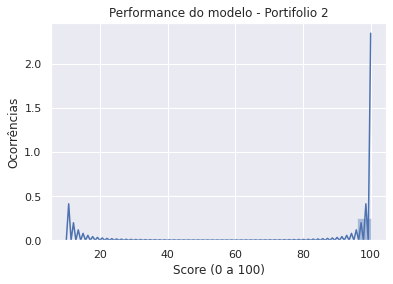

In [201]:
sn.distplot(scores)
plt.title('Performance do modelo - Portifolio 2')
plt.xlabel('Score (0 a 100)')
plt.ylabel('Ocorrências')

In [202]:
end =[]
scores =[]
#achar index das empresas contidas no portifólio
for empresa in id3:
  end.append(id.index(empresa))
#grupo a que cada cluster pertence
clusters = Resultado['Grupo'].iloc[end].values.tolist()
res = pd.DataFrame({'End_portifolio':end,'Grupo_portifolio':clusters})
#fazer iteracao para cada empresa e verificar quantos dos 10 melhores leads também são do portifólio
for i in range(0,len(end)):
  filtro = res['End_portifolio'].loc[res['Grupo_portifolio']==clusters[i]].values.tolist()
  metric = []
  leads  = []
  
  for lead in filtro:
    leads.append(id[lead])
    metric.append(cosine(X[end[i],:],X[lead,:]))
  #print('Para empresa: ',id1[i])
  
  #filtra os melhores leads para a empresa usada
  resultado = pd.DataFrame({'Lead':leads,'Similaridade':metric}).sort_values(by='Similaridade',ascending = False)
  resultado = resultado['Lead'].iloc[:10].values.tolist()
  score = 0
  #verifica quais dos 10 leads também pertencem ao portifólio
  for lead in resultado:
    if lead in id3:
      score = score + 1 
  scores.append(score*10)

Text(0, 0.5, 'Ocorrências')

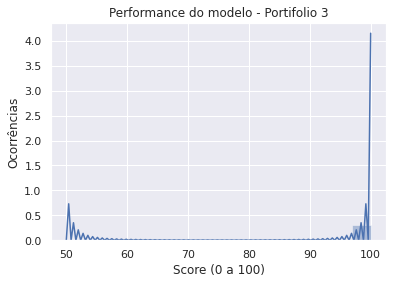

In [203]:
sn.distplot(scores)
plt.title('Performance do modelo - Portifolio 3')
plt.xlabel('Score (0 a 100)')
plt.ylabel('Ocorrências')

A performance está bem aceitável, visto que a maioria dos casos, o modelo consegue reconhecer que outras empresas do portifólio poderiam ser recomendadas.

Os arquivos abaixo foram salvos para aplicação no aplicativo.

In [204]:
Resultado  = pd.DataFrame({'id':id,'Clusters':y.tolist()})

In [205]:
Resultado.to_csv('Resultado.csv')

In [206]:
from numpy import savetxt
savetxt('X.csv',X)